# Hypothesis testing problems

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people; one group follows the first diet, and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: Is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

In [17]:
# TODO
import numpy as np
import scipy.stats as stats

diet_1=[2.0,2.5,3.0,2.8,2.3,2.7,2.5]
diet_2=[3.0,3.2,3.1,2.9,2.8,3.0,3.2]

H0 = 'The average difference between the results of the diets is not significant'
H1= 'The average difference between the results of the diets is significant'

p_value_excpected=.05

t_stat, p_value = stats.ttest_ind(diet_2, diet_1)

print(f'The test statistic is {t_stat} \n and the p-value is {p_value}')

if p_value < p_value_excpected:
    print("The null hypotesis fails to prove that there is no significant difference between the diets")
    print("Therefore we know that there is a significant difference between these two")
else:
    print('We cant reject the null hypothesis, thus we accept that the is no significant difference between diets')




The test statistic is 3.5383407969933938 
 and the p-value is 0.004083270191713912
The null hypotesis fails to prove that there is no significant difference between the diets
Therefore we know that there is a significant difference between these two


## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically include:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

## Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: Is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

In [18]:
# TODO
import pandas as pd

H0 = "There is not a significant difference between the average corn yield in the 3 types of fertilizers"
H1 = "There is a significant difference between the average corn yield in the 3 types of fertilizers"

f_1 = [20,21,20,19,20]
f_2 = [22,21,23,22,21]
f_3 = [24,23,22,23,24]


f_statistic, p_value = stats.f_oneway(f_1,f_2,f_3)

print(f"The f statistic is equal to {f_statistic}, and the p value is {p_value}\n wich tells us that the null hypothesis should be rejected, meaning that there is a significant difference \n between these 3 fertilizers")



The f statistic is equal to 20.315789473684188, and the p value is 0.00014047824793190475
 wich tells us that the null hypothesis should be rejected, meaning that there is a significant difference 
 between these 3 fertilizers


We know that ther is a difference between the efectivness of the fertilizers, but now we need to know wich one is better, for that we are gonna use the tukey test

23.2


group1,group2,meandiff,p-adj,lower,upper,reject
Fertilizer 1,Fertilizer 2,1.8,0.0099,0.4572,3.1428,True
Fertilizer 1,Fertilizer 3,3.2,0.0001,1.8572,4.5428,True
Fertilizer 2,Fertilizer 3,1.4,0.0409,0.0572,2.7428,True


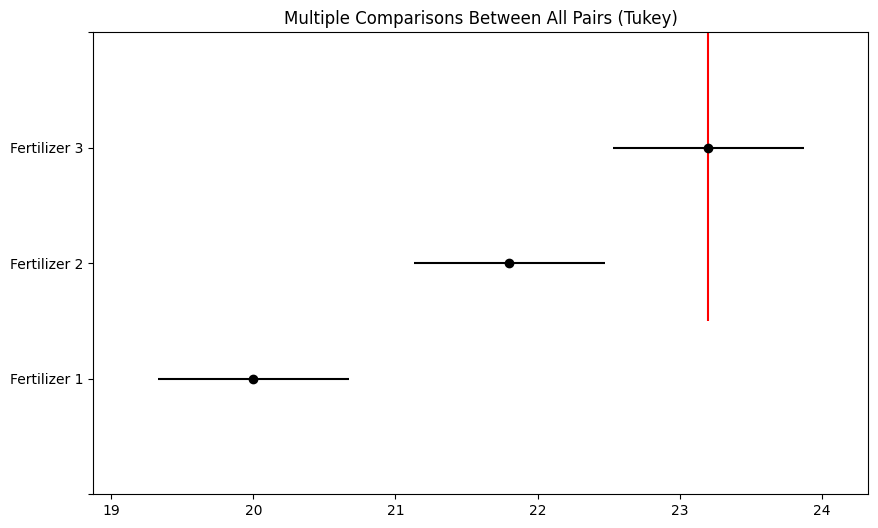

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
data = f_1+f_2+f_3
mean = np.array(f_3).mean()
print(mean)
groups = (['Fertilizer 1']*5)+(['Fertilizer 2']*5)+(['Fertilizer 3']*5)
tukey = pairwise_tukeyhsd(endog=data, groups=groups, alpha=.05)
tukey.plot_simultaneous()
plt.vlines(x= 23.2, ymin=.5, ymax=25, color='red')
tukey.summary()

Utilizando la prueba de tukey podemos ver que existe una diferencia considerable entre los 3 fertilizantes, debido a que nuestro valor p nos determina rechazar la hipotesis nula en cada par, aunado a esto podemos ver que la mayor diferencia esta entre el fertilizante 1 y el 3, dandonos a entender que el peor de los 3 es es 1 y el mejor es el fertilizante 3
Si a esto le sumamos el grafico donde podemos ver con una linea roja la media del fertilizante 3, para comparar con las medias de los otros dos fertilizantes, podemos notar de forma muy evidente que estos presentan una efectividad menor por 1 y 3 kilogramos aproximadamente. 
